## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

## Import modules

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [191]:
data= pd.read_csv("C:\\ML\\26_SentimentalAnalysisusingNLP\\dataset.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [192]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [193]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [194]:
df = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],axis = 1)

In [195]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Preprocessing the dataset

In [196]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [197]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [198]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [199]:
df.head()

,airline_sentiment,text,clean_tweet
0,neutral,@VirginAmerica What @dhepburn said.,What said.
1,positive,@VirginAmerica plus you've added commercials t...,plus you've added commercials to the experien...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I didn't today... Must mean I need to take an...
3,negative,@VirginAmerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""en..."
4,negative,@VirginAmerica and it's a really big bad thing...,and it's a really big bad thing about it


In [200]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,airline_sentiment,text,clean_tweet
0,neutral,@VirginAmerica What @dhepburn said.,What said
1,positive,@VirginAmerica plus you've added commercials t...,plus you ve added commercials to the experien...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,I didn t today Must mean I need to take an...
3,negative,@VirginAmerica it's really aggressive to blast...,it s really aggressive to blast obnoxious en...
4,negative,@VirginAmerica and it's a really big bad thing...,and it s a really big bad thing about it


In [201]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,airline_sentiment,text,clean_tweet
0,neutral,@VirginAmerica What @dhepburn said.,What said
1,positive,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,didn today Must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,really thing about


In [202]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: clean_tweet, dtype: object

In [203]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0                                         [what, said]
1                   [plu, ad, commerci, experi, tacki]
2    [didn, today, must, mean, need, take, anoth, t...
3    [realli, aggress, blast, obnoxi, entertain, yo...
4                               [realli, thing, about]
Name: clean_tweet, dtype: object

In [204]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,airline_sentiment,text,clean_tweet
0,neutral,@VirginAmerica What @dhepburn said.,what said
1,positive,@VirginAmerica plus you've added commercials t...,plu ad commerci experi tacki
2,neutral,@VirginAmerica I didn't today... Must mean I n...,didn today must mean need take anoth trip
3,negative,@VirginAmerica it's really aggressive to blast...,realli aggress blast obnoxi entertain your gue...
4,negative,@VirginAmerica and it's a really big bad thing...,realli thing about


## Exploratory Data Analysis

In [205]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

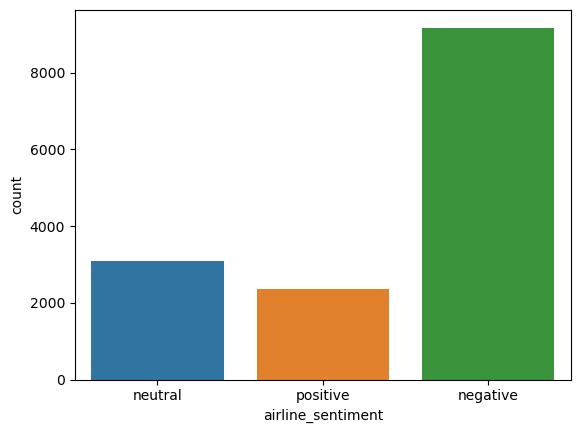

In [241]:
sns.countplot(df['airline_sentiment'])

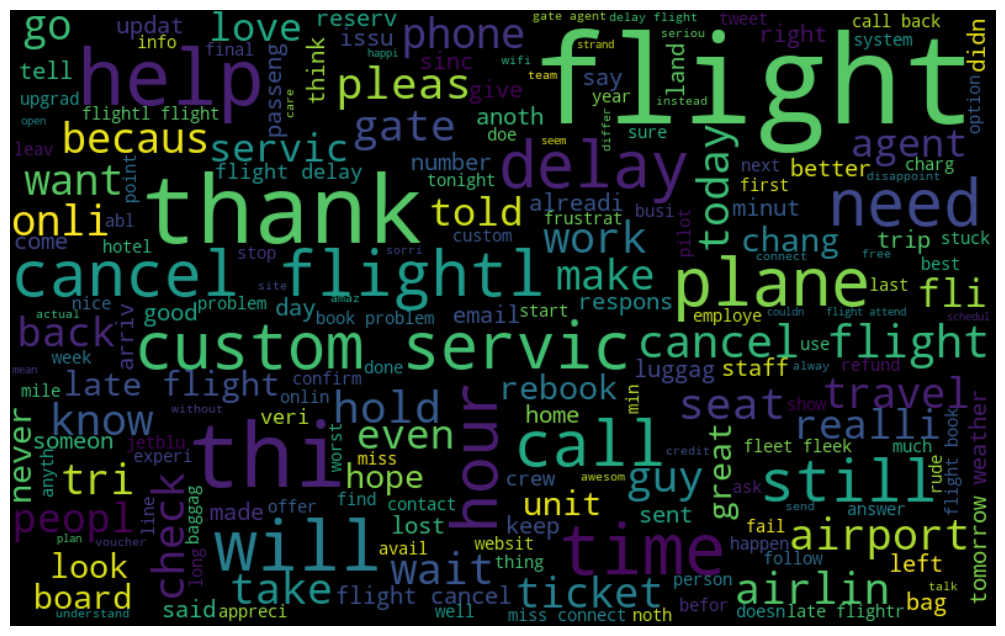

In [242]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

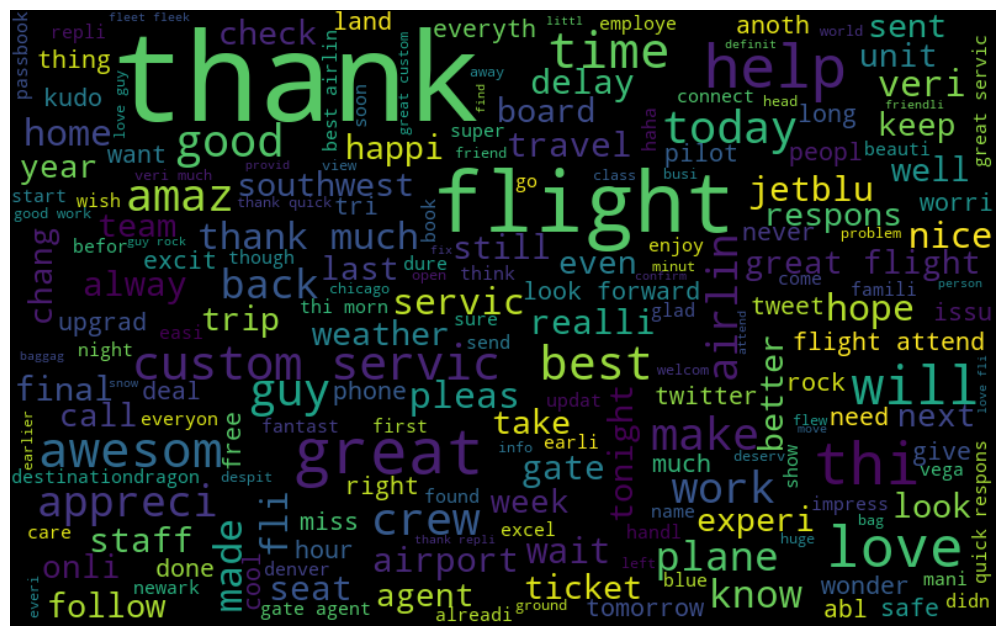

In [243]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['airline_sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

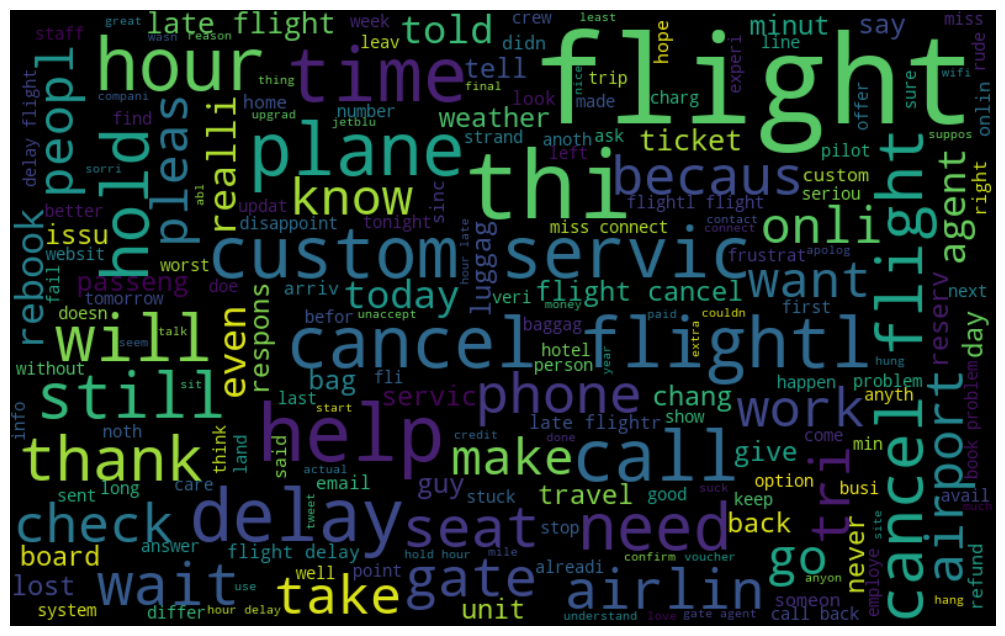

In [244]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['airline_sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

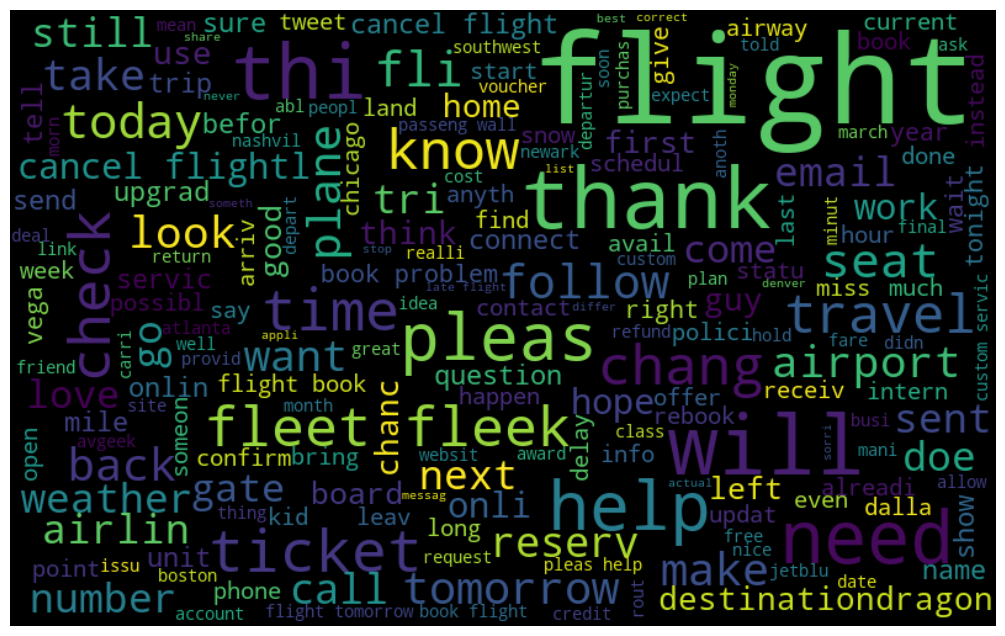

In [245]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['airline_sentiment']=='neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [246]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [247]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['airline_sentiment']=='positive'])

ht_negative = hashtag_extract(df['clean_tweet'][df['airline_sentiment']=='negative'])
ht_neutral = hashtag_extract(df['clean_tweet'][df['airline_sentiment']=='neutral'])

In [248]:
ht_positive[:5]

[[], [], [], [], []]

In [249]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])

In [250]:
ht_positive[:5]

['fabul', 'seduct', 'stress', 'moodlitmonday', 'elevategold']

In [251]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,fabul,1
1,seduct,1
2,stress,1
3,moodlitmonday,1
4,elevategold,1


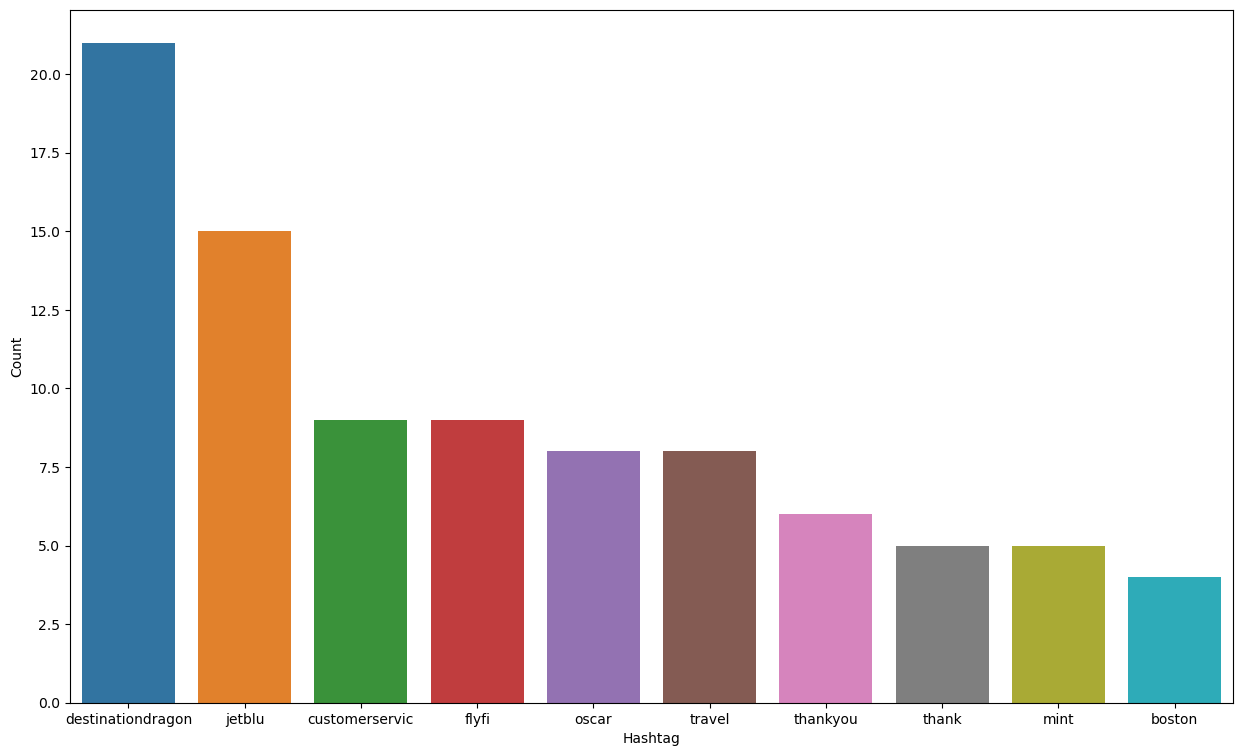

In [252]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [253]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,fail,72
1,noair,1
2,worstflightev,3
3,roast,1
4,sfotobo,1


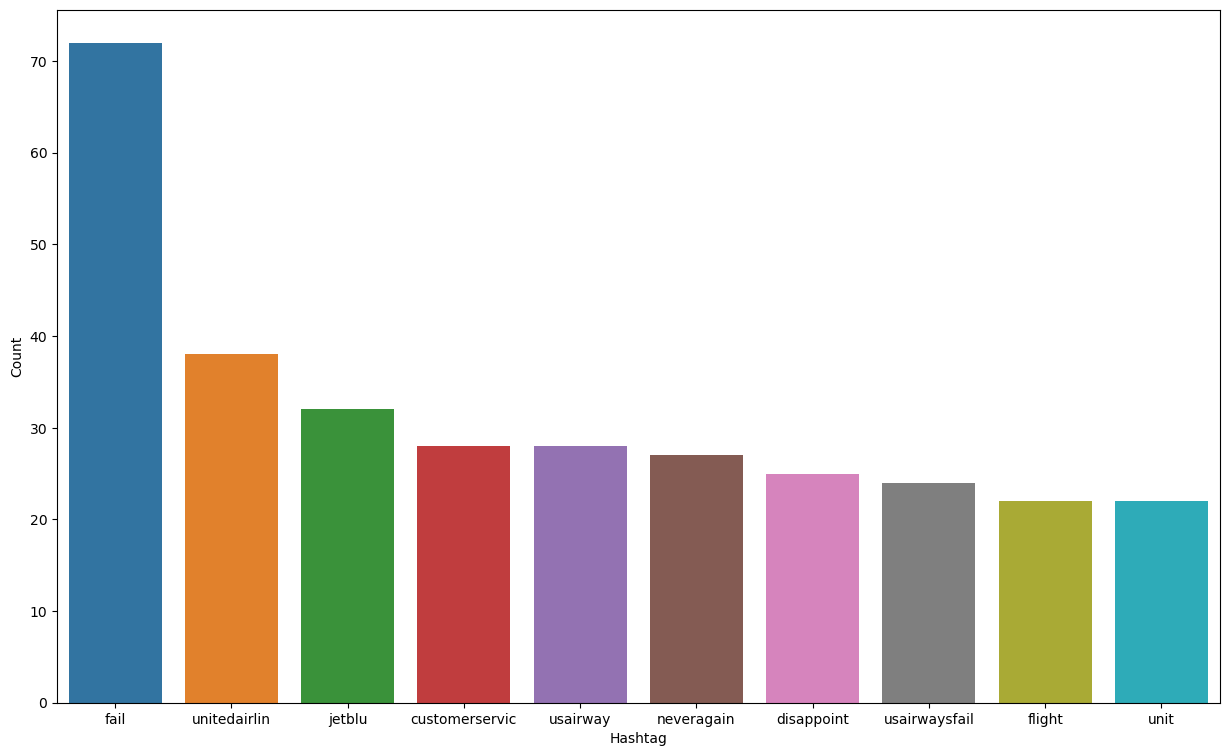

In [254]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [255]:
freq = nltk.FreqDist(ht_neutral)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,sendambien,1
1,andchexmix,1
2,moodlitmonday,1
3,sciencebehindtheexperi,1
4,travelhelp,1


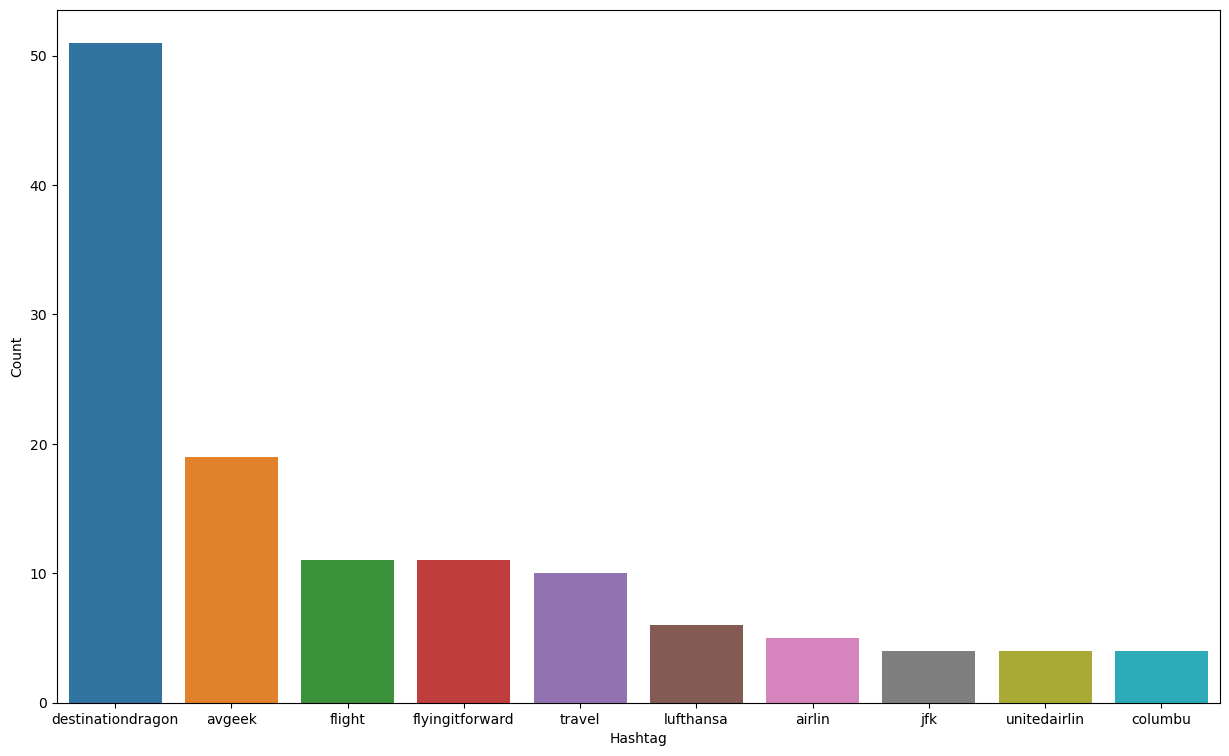

In [256]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Input Split

In [257]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['airline_sentiment'], random_state=42, test_size=0.2)

## Model Training

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [309]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [310]:
# testing
pred = model.predict(x_test)

print('.................classification_report.................')
print(classification_report(pred,y_test))
print('accuracy_score: ',accuracy_score(pred,y_test)*100)



.................classification_report.................
              precision    recall  f1-score   support

    negative       0.89      0.84      0.87      1986
     neutral       0.54      0.61      0.57       512
    positive       0.68      0.73      0.70       430

    accuracy                           0.79      2928
   macro avg       0.70      0.73      0.71      2928
weighted avg       0.80      0.79      0.79      2928

accuracy_score:  78.65437158469946


# confusion_matrix

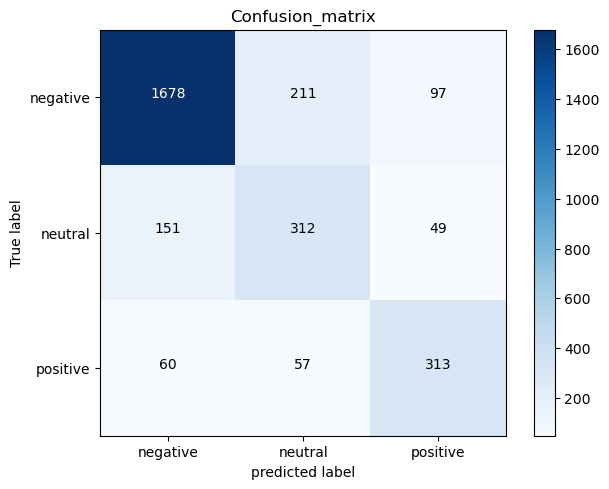

In [312]:
import itertools

def plot_confusion_matrix(cm,classes,title = 'Confusion_matrix',normalizer = False,cmap = plt.cm.Blues):
    
    plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    
    thresh = cm.max()/2
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j]>thresh else 'black')
cm = confusion_matrix(pred,y_test,labels = ['negative','neutral','positive'])
plot_confusion_matrix(cm,classes = ['negative','neutral','positive'] )